
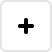
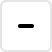
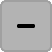
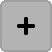
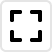
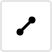
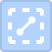
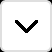
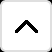
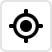
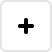
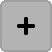
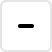
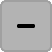
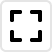
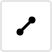
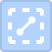
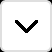
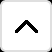
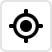

In [1]:
import numpy as np
import pandas as pd

from lets_plot.mapping import as_discrete
from lets_plot import *

LetsPlot.setup_html()

In [2]:
np.random.seed(1)

n = 4
x = list(range(n))
y = np.random.rand(n)
data = {'x': x, 'y': y}

p = ggplot(data, aes('x', 'y'))

#### `override_aes` in `guide_legend()`

To specify aesthetic parameters of legend key

In [3]:
p1 = p + geom_point(aes(color=as_discrete('x'))) + ggsize(400, 200)
p1

In [4]:
# Set new values

p1 + guides(color=guide_legend(
        override_aes=dict(shape=22, size=8, stroke=1.8, fill='light-grey', alpha=0.6)
    ))

In [5]:
# Use list of values

p1 + guides(color=guide_legend(
        override_aes=dict(color=['red', 'blue', 'green', 'pink'])
    ))

In [6]:
# Use a list that is smaller than the number of legend keys
#  (the rest will get their original values)

p1 + guides(color=guide_legend(
        override_aes=dict(color=['grey'], size=[10, 8])
    ))

In [7]:
# For custom legend 
# (everything can also be specified via layer_key())

p + geom_point(show_key="Point") + \
    guides(custom_legend=guide_legend(
            override_aes=dict(shape=23, size=15, stroke=2, alpha=0.6, fill='red', color='red'))
          ) + \
    ggsize(400, 200)

In [8]:
# combined icons - `color` to point and line 

p2 = ggplot(data, aes('x', 'y', color=as_discrete('x'))) + \
    geom_point() + \
    geom_line()

gggrid([
    p2,
    p2 + guides(color=guide_legend(
        override_aes=dict(shape=21, linetype=2)
    ))
]) + ggsize(800, 200)

In [9]:
# `fill` and `size` to the same variable:

p3 = ggplot({'n': ['a', 'b', 'c']}) + geom_pie(aes(fill='n', size='n'), stat='identity') + ggsize(400, 300)
p3

In [10]:
# Settings for one legend but via different aes (conflicting):

p3 + guides(fill=guide_legend(override_aes=dict(color='blue')),
            size=guide_legend(override_aes=dict(stroke=4, color='black')))

In [11]:
# For custom legend

In [12]:
p4 = p + \
    geom_point(show_key=layer_key("Point")) + \
    geom_line(show_key=layer_key("Line")) 

gggrid([
    p4,
    p4 + guides(custom_legend=guide_legend(override_aes=dict(size=6))),
    p4 + guides(custom_legend=guide_legend(override_aes=dict(size=[6, 2], color=['red', 'blue'])))
]) + ggsize(900, 200)

In [13]:
# Change order in legend via `index` in `layer_key`

p5 = p + \
    geom_point(show_key=layer_key("Point", index = 1)) + \
    geom_line(show_key=layer_key("Line", index = 0))

gggrid([
    p5,
    p5 + guides(custom_legend=guide_legend(override_aes=dict(size=[2], color=['red', 'blue'])))
]) + ggsize(600, 200)